In [1]:
#. Import Libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)
import matplotlib.pyplot as plt

In [2]:
#2. Load ML-Ready Data

X_train = pd.read_csv("../data/processed/X_train.csv")
X_test  = pd.read_csv("../data/processed/X_test.csv")
y_train = pd.read_csv("../data/processed/y_train.csv").values.ravel()
y_test  = pd.read_csv("../data/processed/y_test.csv").values.ravel()

In [4]:
#3. Baseline Model – Logistic Regression
#3.1 Train Model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [5]:
#3.2 Predictions & Evaluation
y_pred_lr = log_reg.predict(X_test)
y_prob_lr = log_reg.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_lr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4488
           1       1.00      1.00      1.00      2031

    accuracy                           1.00      6519
   macro avg       1.00      1.00      1.00      6519
weighted avg       1.00      1.00      1.00      6519

ROC-AUC: 1.0


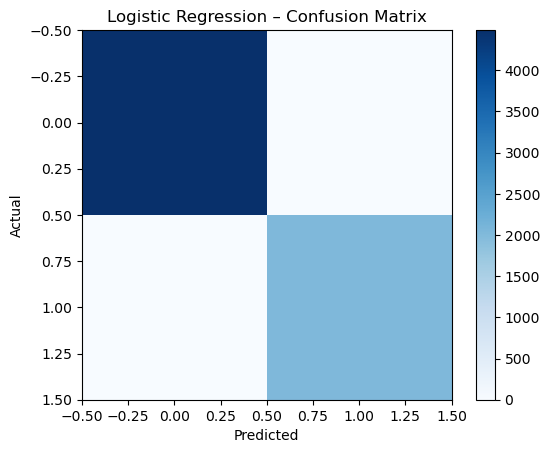

In [6]:
#3.3 Confusion Matrix
cm = confusion_matrix(y_test, y_pred_lr)

plt.imshow(cm, cmap='Blues')
plt.title("Logistic Regression – Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.colorbar()
plt.show()

In [7]:
#4. Advanced Model – Random Forest
#4.1 Train Model
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight="balanced"
)

rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

In [8]:
#4.2 Evaluation
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4488
           1       1.00      1.00      1.00      2031

    accuracy                           1.00      6519
   macro avg       1.00      1.00      1.00      6519
weighted avg       1.00      1.00      1.00      6519

ROC-AUC: 1.0


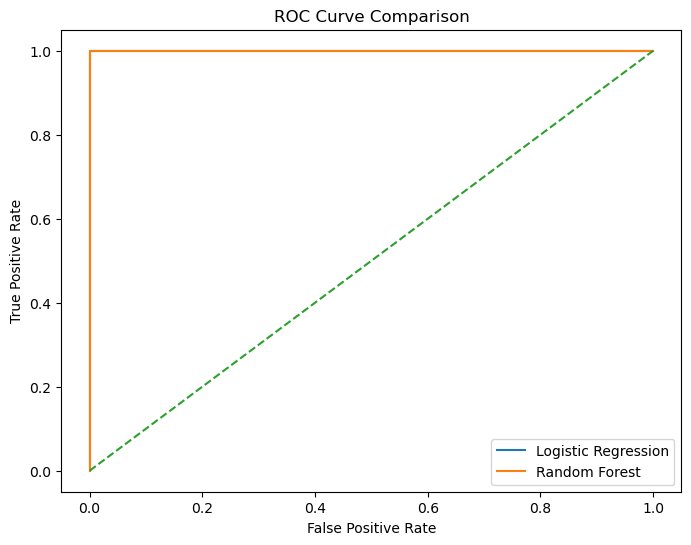

In [9]:
#5. ROC Curve Comparison
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

plt.figure(figsize=(8,6))
plt.plot(fpr_lr, tpr_lr, label="Logistic Regression")
plt.plot(fpr_rf, tpr_rf, label="Random Forest")
plt.plot([0,1], [0,1], linestyle="--")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

In [10]:
#6. Feature Importance (Random Forest)
feature_importance = pd.DataFrame({
    "feature": X_train.columns,
    "importance": rf.feature_importances_
}).sort_values(by="importance", ascending=False)

feature_importance.head(10)

,feature,importance
40,final_result_Withdrawn,0.455035
38,final_result_Fail,0.121703
39,final_result_Pass,0.100060
5,last_active_day,0.091662
11,submissions,0.063706
8,max_score,0.035955
7,avg_score,0.022081
3,active_days,0.020357
9,min_score,0.017494
0,total_clicks,0.012135


7. Model Comparison Summary (Markdown Cell)

Model Performance Summary:

Logistic Regression provided a strong, interpretable baseline

Random Forest captured non-linear behavioral patterns

Engagement and inactivity features were the strongest churn predictors

Recall was prioritized to identify at-risk students early

In [12]:
#8. Save Best Model Predictions (Optional but Pro)
predictions = X_test.copy()
predictions['actual_churn'] = y_test
predictions['predicted_churn_prob'] = y_prob_rf

predictions.to_csv(
    "../data/processed/churn_predictions.csv",
    index=False
)

END OF NOTEBOOK 05
What You Have Achieved:

✔ Built baseline & advanced models
✔ Evaluated using proper metrics
✔ Identified key churn drivers
✔ Generated prediction outputs